In [1]:
import import_ipynb
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq

importing Jupyter notebook from ../dataset/sequence.ipynb
importing Jupyter notebook from ../common/optimizer.ipynb
importing Jupyter notebook from ../common/trainer.ipynb
importing Jupyter notebook from ../common/util.ipynb
importing Jupyter notebook from seq2seq.ipynb
importing Jupyter notebook from ../common/time_layers.ipynb
importing Jupyter notebook from ../common/layers.ipynb
importing Jupyter notebook from ../common/functions.ipynb
importing Jupyter notebook from ../common/base_model.ipynb
importing Jupyter notebook from peeky_seq2seq.ipynb


In [2]:
#  데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
char_to_id, id_to_char = sequence.get_vocab()

In [3]:
# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

In [4]:
# 객체들 설정
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

In [5]:
acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch = 1, batch_size = batch_size, max_grad = max_grad)
    correct_num = 0
    for i in range(len(x_test)): 
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i<10
        correct_num += eval_seq2seq(model, question, correct, id_to_char, verbose)
    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 : {}'.format(acc * 100, ".3f"))

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.45
| 에폭 1 |  반복 41 / 351 | 시간 3[s] | 손실 2.15
| 에폭 1 |  반복 61 / 351 | 시간 6[s] | 손실 1.95
| 에폭 1 |  반복 81 / 351 | 시간 8[s] | 손실 1.84
| 에폭 1 |  반복 101 / 351 | 시간 10[s] | 손실 1.81
| 에폭 1 |  반복 121 / 351 | 시간 11[s] | 손실 1.80
| 에폭 1 |  반복 141 / 351 | 시간 13[s] | 손실 1.78
| 에폭 1 |  반복 161 / 351 | 시간 15[s] | 손실 1.77
| 에폭 1 |  반복 181 / 351 | 시간 17[s] | 손실 1.76
| 에폭 1 |  반복 201 / 351 | 시간 18[s] | 손실 1.76
| 에폭 1 |  반복 221 / 351 | 시간 20[s] | 손실 1.75
| 에폭 1 |  반복 241 / 351 | 시간 21[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 23[s] | 손실 1.74
| 에폭 1 |  반복 281 / 351 | 시간 25[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 26[s] | 손실 1.73
| 에폭 1 |  반복 321 / 351 | 시간 28[s] | 손실 1.73
| 에폭 1 |  반복 341 / 351 | 시간 30[s] | 손실 1.72
Q   58+77
T 162 
☒ 100 
---
Q 461+579
T 1139
☒ 1013
---
Q  48+285
T 666 
☒ 102 
---
Q   551+8
T 163 
☒ 101 
---
Q  55+763
T 422 
☒ 102 
---
Q 752+006
T 857 
☒ 1023
---
Q 292+167
T 1053
☒ 1023
---
Q 795+038
T 1427
☒ 1113

| 에폭 8 |  반복 21 / 351 | 시간 1[s] | 손실 0.39
| 에폭 8 |  반복 41 / 351 | 시간 4[s] | 손실 0.38
| 에폭 8 |  반복 61 / 351 | 시간 7[s] | 손실 0.37
| 에폭 8 |  반복 81 / 351 | 시간 8[s] | 손실 0.37
| 에폭 8 |  반복 101 / 351 | 시간 10[s] | 손실 0.37
| 에폭 8 |  반복 121 / 351 | 시간 12[s] | 손실 0.36
| 에폭 8 |  반복 141 / 351 | 시간 13[s] | 손실 0.34
| 에폭 8 |  반복 161 / 351 | 시간 15[s] | 손실 0.33
| 에폭 8 |  반복 181 / 351 | 시간 18[s] | 손실 0.33
| 에폭 8 |  반복 201 / 351 | 시간 19[s] | 손실 0.32
| 에폭 8 |  반복 221 / 351 | 시간 21[s] | 손실 0.31
| 에폭 8 |  반복 241 / 351 | 시간 23[s] | 손실 0.30
| 에폭 8 |  반복 261 / 351 | 시간 24[s] | 손실 0.30
| 에폭 8 |  반복 281 / 351 | 시간 26[s] | 손실 0.29
| 에폭 8 |  반복 301 / 351 | 시간 28[s] | 손실 0.27
| 에폭 8 |  반복 321 / 351 | 시간 30[s] | 손실 0.27
| 에폭 8 |  반복 341 / 351 | 시간 31[s] | 손실 0.26
Q   58+77
T 162 
☑ 162 
---
Q 461+579
T 1139
☒ 1239
---
Q  48+285
T 666 
☒ 665 
---
Q   551+8
T 163 
☑ 163 
---
Q  55+763
T 422 
☑ 422 
---
Q 752+006
T 857 
☑ 857 
---
Q 292+167
T 1053
☑ 1053
---
Q 795+038
T 1427
☑ 1427
---
Q  838+62
T 864 
☑ 864 
---
Q  39+34

검증 정확도 : 96.38
| 에폭 15 |  반복 1 / 351 | 시간 0[s] | 손실 0.03
| 에폭 15 |  반복 21 / 351 | 시간 1[s] | 손실 0.03
| 에폭 15 |  반복 41 / 351 | 시간 3[s] | 손실 0.04
| 에폭 15 |  반복 61 / 351 | 시간 5[s] | 손실 0.04
| 에폭 15 |  반복 81 / 351 | 시간 7[s] | 손실 0.03
| 에폭 15 |  반복 101 / 351 | 시간 8[s] | 손실 0.04
| 에폭 15 |  반복 121 / 351 | 시간 10[s] | 손실 0.04
| 에폭 15 |  반복 141 / 351 | 시간 11[s] | 손실 0.04
| 에폭 15 |  반복 161 / 351 | 시간 13[s] | 손실 0.04
| 에폭 15 |  반복 181 / 351 | 시간 15[s] | 손실 0.04
| 에폭 15 |  반복 201 / 351 | 시간 17[s] | 손실 0.04
| 에폭 15 |  반복 221 / 351 | 시간 20[s] | 손실 0.04
| 에폭 15 |  반복 241 / 351 | 시간 21[s] | 손실 0.04
| 에폭 15 |  반복 261 / 351 | 시간 23[s] | 손실 0.05
| 에폭 15 |  반복 281 / 351 | 시간 25[s] | 손실 0.04
| 에폭 15 |  반복 301 / 351 | 시간 27[s] | 손실 0.05
| 에폭 15 |  반복 321 / 351 | 시간 28[s] | 손실 0.04
| 에폭 15 |  반복 341 / 351 | 시간 31[s] | 손실 0.04
Q   58+77
T 162 
☑ 162 
---
Q 461+579
T 1139
☑ 1139
---
Q  48+285
T 666 
☑ 666 
---
Q   551+8
T 163 
☑ 163 
---
Q  55+763
T 422 
☑ 422 
---
Q 752+006
T 857 
☑ 857 
---
Q 292+167
T 1053
☑ 

검증 정확도 : 99.2
| 에폭 22 |  반복 1 / 351 | 시간 0[s] | 손실 0.01
| 에폭 22 |  반복 21 / 351 | 시간 1[s] | 손실 0.01
| 에폭 22 |  반복 41 / 351 | 시간 3[s] | 손실 0.01
| 에폭 22 |  반복 61 / 351 | 시간 5[s] | 손실 0.01
| 에폭 22 |  반복 81 / 351 | 시간 7[s] | 손실 0.01
| 에폭 22 |  반복 101 / 351 | 시간 9[s] | 손실 0.01
| 에폭 22 |  반복 121 / 351 | 시간 10[s] | 손실 0.01
| 에폭 22 |  반복 141 / 351 | 시간 12[s] | 손실 0.01
| 에폭 22 |  반복 161 / 351 | 시간 14[s] | 손실 0.01
| 에폭 22 |  반복 181 / 351 | 시간 15[s] | 손실 0.01
| 에폭 22 |  반복 201 / 351 | 시간 17[s] | 손실 0.01
| 에폭 22 |  반복 221 / 351 | 시간 20[s] | 손실 0.01
| 에폭 22 |  반복 241 / 351 | 시간 21[s] | 손실 0.01
| 에폭 22 |  반복 261 / 351 | 시간 23[s] | 손실 0.01
| 에폭 22 |  반복 281 / 351 | 시간 25[s] | 손실 0.01
| 에폭 22 |  반복 301 / 351 | 시간 26[s] | 손실 0.01
| 에폭 22 |  반복 321 / 351 | 시간 28[s] | 손실 0.01
| 에폭 22 |  반복 341 / 351 | 시간 30[s] | 손실 0.01
Q   58+77
T 162 
☑ 162 
---
Q 461+579
T 1139
☑ 1139
---
Q  48+285
T 666 
☑ 666 
---
Q   551+8
T 163 
☑ 163 
---
Q  55+763
T 422 
☑ 422 
---
Q 752+006
T 857 
☑ 857 
---
Q 292+167
T 1053
☑ 1

In [6]:
print(t_test)
print(t_test.shape)

[[ 6  0  1  8  5]
 [ 6  0  0 10  7]
 [ 6  1  1  1  5]
 ...
 [ 6  7  9 12  5]
 [ 6  0  9  8 10]
 [ 6  3  9 12  5]]
(5000, 5)


/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 54253 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54869 missing from current font.
  font.set_text

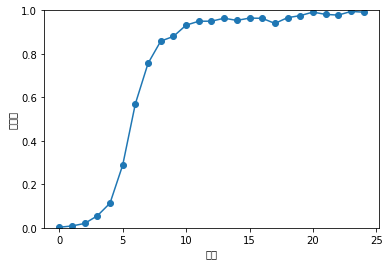

In [7]:
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('에폭')
plt.ylabel('정확도')
plt.ylim(0, 1.0)
plt.show()